## Handling of Imbalanced datasets

### 1. Upsampling

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
np.random.seed(45)
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0 , scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=0 , scale=1 , size=n_class_1),
    'target' : [1] * n_class_1
})

In [5]:
df = pd.concat([class_0 , class_1]).reset_index(drop = True)
df.head()

,feature_1,feature_2,target
0,0.026375,1.174203,0
1,0.260322,-0.925556,0
2,-0.395146,0.187542,0
3,-0.204301,-0.517189,0
4,-1.271633,-0.493883,0


In [6]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [7]:
df_minority = df[df['target'] == 1]
df_majority = df[df['target'] == 0]

In [8]:
from sklearn.utils import resample

In [9]:
df_minority_upsampled = resample(df_minority , replace=True, n_samples=len(df_majority) , random_state= 25)

In [10]:
df_minority_upsampled.shape

(900, 3)

In [12]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.head()

,feature_1,feature_2,target
0,0.026375,1.174203,0
1,0.260322,-0.925556,0
2,-0.395146,0.187542,0
3,-0.204301,-0.517189,0
4,-1.271633,-0.493883,0


### 2. Downsampling

In [13]:
df_majority_downsampled = resample(df_majority, replace = False , n_samples= len(df_minority))
df_majority_downsampled.head()

,feature_1,feature_2,target
402,-0.497554,1.188690,0
161,0.853374,-0.356096,0
312,-0.726213,1.818128,0
854,0.703535,-1.054186,0
875,0.487642,-1.108002,0


In [14]:
df_downsampled = pd.concat([df_majority_downsampled , df_minority])
df_downsampled.shape

(200, 3)

### 3. SMOTE (Synthetic Minority Oversampling Technique)

In [35]:
from sklearn.datasets import make_classification

In [36]:
X,y = make_classification(n_samples= 1000 , n_features= 2 , n_clusters_per_class=1, n_redundant=0,
                    weights=[0.9], random_state=50)

In [37]:
df1 = pd.DataFrame(X, columns=['f1' , 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

final_df = pd.concat([df1,df2], axis = 1)
final_df.head()

,f1,f2,target
0,-1.643311,1.896569,0
1,0.999592,-0.960569,1
2,-2.242660,3.175988,0
3,-0.891789,0.970848,0
4,-1.273694,0.857977,0


In [38]:
final_df['target'].value_counts()

target
0    896
1    104
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

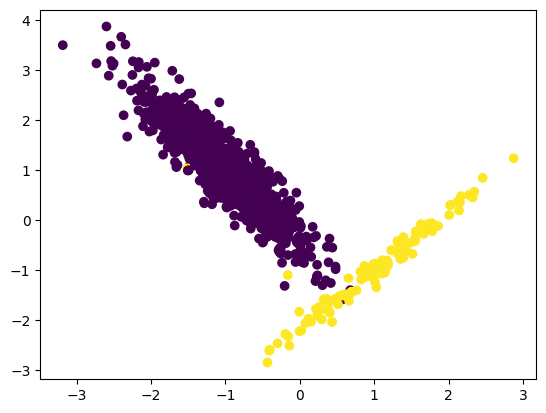

In [40]:
plt.scatter(final_df['f1'] , final_df['f2'], c = final_df['target'])

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']] , final_df['target'])

In [43]:
X.shape

(1792, 2)

In [44]:
y.shape

(1792,)

In [45]:
df1 = pd.DataFrame(X, columns=['f1' , 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

oversampled_df = pd.concat([df1,df2], axis = 1)
oversampled_df.head()

,f1,f2,target
0,-1.643311,1.896569,0
1,0.999592,-0.960569,1
2,-2.242660,3.175988,0
3,-0.891789,0.970848,0
4,-1.273694,0.857977,0


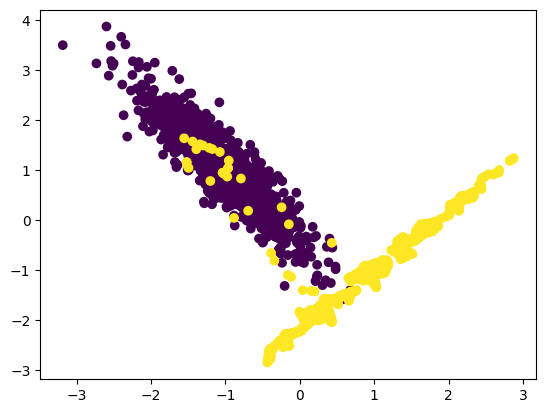

In [46]:
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df['target'])

## Handling of Outliers

5 number summary and box plot:

Minimum, Maximum, Median, Q1, Q3, IQR

In [3]:
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
min,q1,median,q3,max = np.quantile(lst_marks,[0,0.25,0.5,0.75,1])

In [4]:
min,q1,median,q3,max

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [5]:
IQR = q3 - q1
print(IQR)

35.0


In [6]:
lower_fence = q1 - 1.5*(IQR)
higher_fence = q3 + 1.5*(IQR)

In [7]:
print(lower_fence, higher_fence)

1.5 141.5


<Axes: >

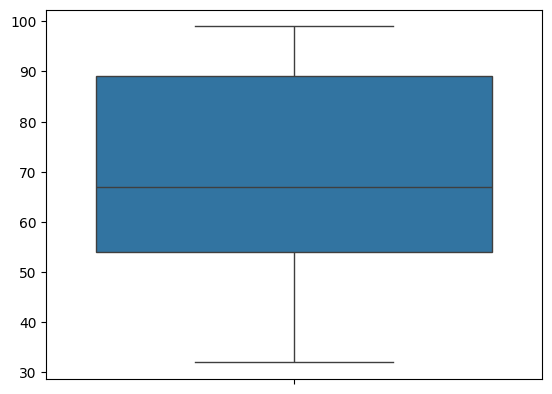

In [8]:
sns.boxplot(lst_marks)

In [13]:
lst_marks = [-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,150,170,180]

<Axes: >

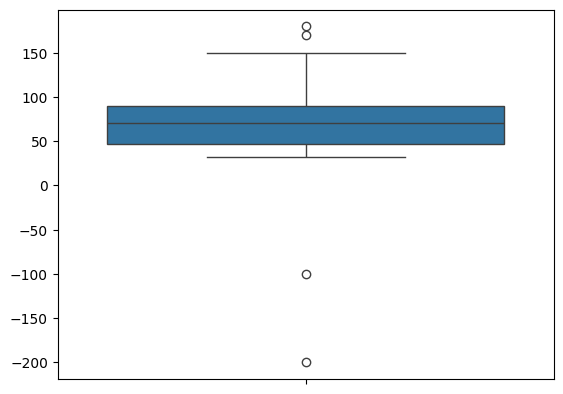

In [14]:
sns.boxplot(lst_marks)

## Data Encoding

### 1. Nominal or One Hot Encoding

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
df = pd.DataFrame({'color' : ['red' , 'blue' , 'green' , 'green' , 'red' , 'blue']})

In [17]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [19]:
## create an instance of onehot encoder
encoder = OneHotEncoder()

In [23]:
## perform fit and then transform
encoded_values = encoder.fit_transform(df[['color']]).toarray()

In [25]:
encoded_df = pd.DataFrame(encoded_values, columns = encoder.get_feature_names_out())

In [26]:
encoded_df.head()

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [28]:
## for new data
encoder.transform([['blue']]).toarray()

c:\Users\Lenovo\OneDrive\Documents\Data Science,ML\Git\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [29]:
pd.concat([df , encoded_df] , axis = 1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [32]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(tips_df[['sex' , 'smoker' , 'day' , 'time']]).toarray()

In [35]:
tips_encoded_df = pd.DataFrame(encoded , columns = encoder.get_feature_names_out())
tips_encoded_df.head()

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
tips_final_df = pd.concat([tips_df , tips_encoded_df] , axis = 1)

In [37]:
tips_final_df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### 2. Label Encoding

In [38]:
df.head()

,color
0,red
1,blue
2,green
3,green
4,red


In [39]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()

In [40]:
lbl_encoder.fit_transform(df[['color']])

c:\Users\Lenovo\OneDrive\Documents\Data Science,ML\Git\code\venv\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 1, 1, 2, 0])

In [41]:
lbl_encoder.transform([['red']])

c:\Users\Lenovo\OneDrive\Documents\Data Science,ML\Git\code\venv\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

### 3. Ordinal Encoding

In [42]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
df = pd.DataFrame({
    'size' : ['small' , 'medium' , 'large' , 'medium' , 'small' , 'large']
})

In [45]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [47]:
## create an instance of ordinal encoder and then fit_transfor
encoder = OrdinalEncoder(categories=[['small' , 'medium' , 'large']])

In [48]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [50]:
encoder.transform([['small']])

c:\Users\Lenovo\OneDrive\Documents\Data Science,ML\Git\code\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

### 4. Target Guided Ordinal Encoding

In [51]:
df = pd.DataFrame({
    'city' : ['New York' , 'London' , 'Paris' , 'Tokyo' , 'New York' , 'Paris'],
    'price' : [200,150,300,250,180,320]
})

In [52]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [55]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [56]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [57]:
df['city_encoded'] = df['city'].map(mean_price)

In [58]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [59]:
## give the below two features for model training
df[['price' , 'city_encoded']]

,price,city_encoded
0,200,190.0
1,150,150.0
2,300,310.0
3,250,250.0
4,180,190.0
5,320,310.0


In [60]:
#assignment
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [63]:
time_encoded = tips_df.groupby('time')['total_bill'].mean().to_dict()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3324\3398969790.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_encoded = tips_df.groupby('time')['total_bill'].mean().to_dict()


In [64]:
time_encoded

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [65]:
tips_df['time_encoded'] = tips_df['time'].map(time_encoded)
tips_df

,total_bill,tip,sex,smoker,day,time,size,time_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,20.797159
1,10.34,1.66,Male,No,Sun,Dinner,3,20.797159
2,21.01,3.50,Male,No,Sun,Dinner,3,20.797159
3,23.68,3.31,Male,No,Sun,Dinner,2,20.797159
4,24.59,3.61,Female,No,Sun,Dinner,4,20.797159
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.797159
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.797159
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.797159
242,17.82,1.75,Male,No,Sat,Dinner,2,20.797159
